#Importando bases de datos

In [1]:
import pandas as pd
url = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'
data = pd.read_csv(url, sep = ';')
data.head()


,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [2]:
data.tail()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN
25120,Conjunto Comercial/Sala,Centro Histórico,0,0,0,250,22750.0,14721.0,3881.5


In [3]:
type(data)

pandas.core.frame.DataFrame

## **Exploración inicial de los datos**

In [4]:
data.shape

(25121, 9)

In [5]:
data.columns

Index(['Tipo', 'Colonia', 'Habitaciones', 'Garages', 'Suites', 'Area', 'Valor',
       'Condominio', 'Impuesto'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [7]:
data['Tipo']

0                       Cocineta
1                           Casa
2        Conjunto Comercial/Sala
3                   Departamento
4                   Departamento
                  ...           
25116    Cochera/Estacionamiento
25117                   Cocineta
25118               Departamento
25119               Departamento
25120    Conjunto Comercial/Sala
Name: Tipo, Length: 25121, dtype: object

In [8]:
data[['Habitaciones', 'Valor']]

,Habitaciones,Valor
0,1,5950.0
1,2,24500.0
2,0,18200.0
3,1,2800.0
4,1,2800.0
...,...,...
25116,0,49000.0
25117,0,2800.0
25118,2,4900.0
25119,2,10500.0


## **Demandas de ML**

### **Análisis exploratorio de los datos**

### ¿Cuáles don los valores promedio de alquiler por tipoo de propiedad?

In [9]:
#PROMEDIO GENERAL
data['Valor'].mean()

np.float64(36885.05048392878)

In [10]:
data.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Cocineta,4425.856061
Posada/Chalé,5180.000000
Casa de Vecindad,5961.740506
Cochera/Estacionamiento,6995.454545
Estudio,8400.000000
Loft,9924.526316
Departamento en Hotel,16285.430769
Departamento,18683.269431
Casa,31453.177064


<Axes: ylabel='Tipo'>

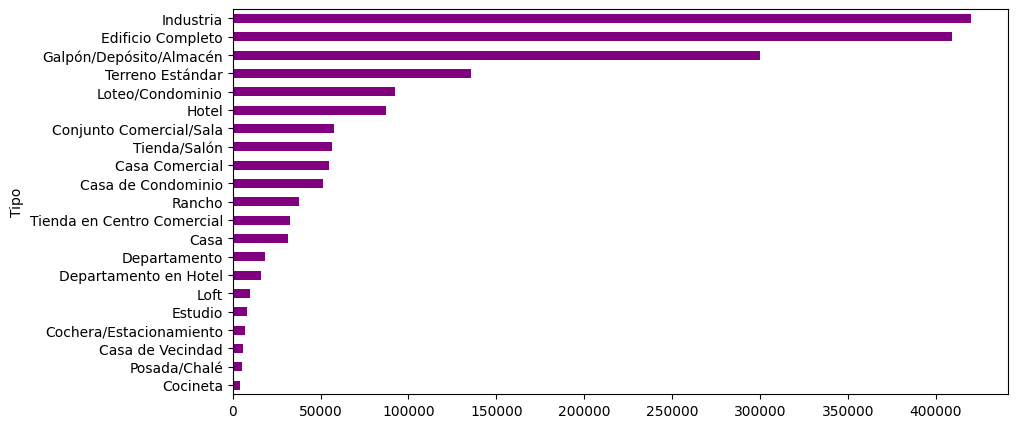

In [11]:
df_price_groupby =data.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_price_groupby.plot (kind='barh', figsize=(10, 5), color='purple', legend=False)



In [12]:
data.Tipo.unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [13]:
inmuebles_comerciales = ['Conjunto Comercial/Sala','Edificio Completo', 'Tienda/Salón', 'Casa Comercial', 
       'Terreno Estándar', 'Cochera/Estacionamiento','Galpón/Depósito/Almacén', 
       'Tienda en Centro Comercial','Hotel', 'Loteo/Condominio','Industria']

In [14]:
data.query('@inmuebles_comerciales in Tipo')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
6,Conjunto Comercial/Sala,Centro Histórico,0,3,0,695,122500.0,67175.5,10605.0
11,Edificio Completo,Roma,0,0,0,536,98000.0,NaN,12470.5
24,Conjunto Comercial/Sala,Santa Fe,0,1,0,22,2450.0,NaN,NaN
26,Conjunto Comercial/Sala,Centro Histórico,0,5,0,1306,411390.0,68201.0,NaN
...,...,...,...,...,...,...,...,...,...
25107,Conjunto Comercial/Sala,Santa Fe,0,1,0,55,7000.0,3836.0,NaN
25110,Conjunto Comercial/Sala,Centro Histórico,0,0,0,140,14000.0,4942.0,1736.0
25112,Conjunto Comercial/Sala,Centro Histórico,0,0,0,32,2100.0,3622.5,290.5
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN


In [15]:
df_residencial = data.query('@inmuebles_comerciales not in Tipo')
df_residencial

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25115,Casa de Condominio,Santa Fe,5,3,4,450,52500.0,5988.5,8162.0
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


<Axes: ylabel='Tipo'>

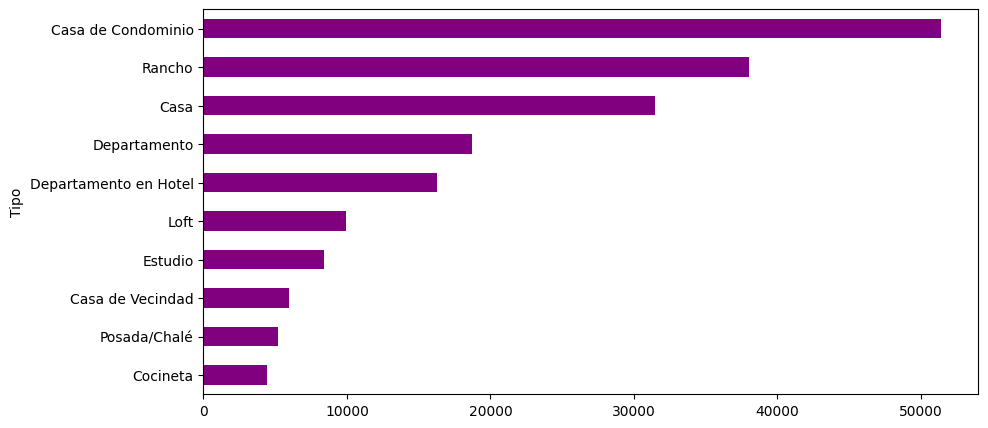

In [16]:
df_price_groupby =df_residencial.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_price_groupby.plot (kind='barh', figsize=(10, 5), color='purple', legend=False)

#### Porcentaje de cada tipo de inmueble presente en la base de datos

In [17]:
df_residencial.Tipo.unique()

array(['Cocineta', 'Casa', 'Departamento', 'Casa de Condominio',
       'Departamento en Hotel', 'Casa de Vecindad', 'Loft', 'Rancho',
       'Posada/Chalé', 'Estudio'], dtype=object)

In [18]:
df_residencial.Tipo.value_counts()

Tipo
Departamento             14764
Cocineta                   726
Casa de Condominio         610
Casa                       545
Departamento en Hotel      455
Casa de Vecindad           158
Loft                        38
Rancho                       8
Estudio                      4
Posada/Chalé                 1
Name: count, dtype: int64

In [19]:
df_residencial.Tipo.value_counts(normalize=True)

Tipo
Departamento             0.852967
Cocineta                 0.041943
Casa de Condominio       0.035242
Casa                     0.031487
Departamento en Hotel    0.026287
Casa de Vecindad         0.009128
Loft                     0.002195
Rancho                   0.000462
Estudio                  0.000231
Posada/Chalé             0.000058
Name: proportion, dtype: float64

In [20]:
df_deptos =df_residencial.query('Tipo == "Departamento"')
df_deptos

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [21]:
porcentaje_tipo = df_residencial.Tipo.value_counts(normalize=True).to_frame()

<Axes: xlabel='Tipos', ylabel='Porcentaje'>

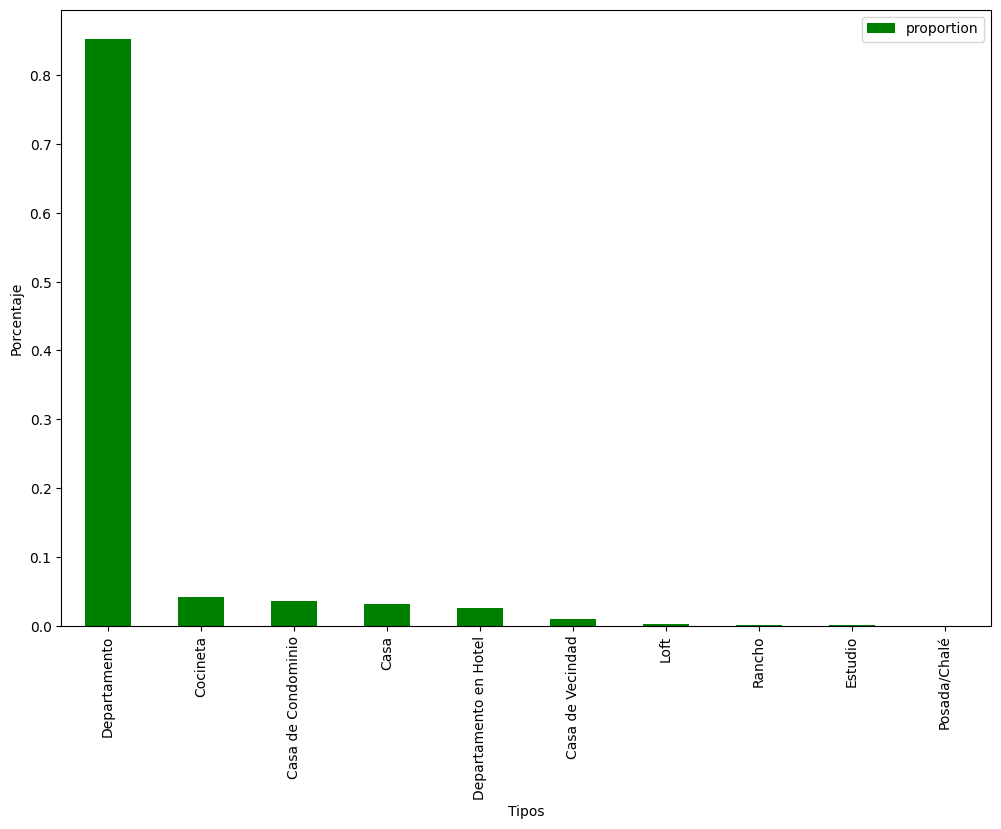

In [22]:
porcentaje_tipo.plot(kind ='bar',figsize = (12,8), color = 'green', xlabel ='Tipos', ylabel = 'Porcentaje')

In [23]:
df_deptos =df_residencial.query('Tipo == "Departamento"')
df_deptos.head(2)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [24]:
df_deptos.shape 

(14764, 9)

In [25]:
#Promedio de habitaciones por departamento
df_deptos['Habitaciones'].mean()

np.float64(2.5041994039555675)

In [26]:
#Colonias únicas en base de datos
df_deptos['Colonia'].unique()




array(['Centro Histórico', 'Del Valle', 'Condesa', 'Santa Fe', 'Narvarte',
       'Coyoacán', 'Roma', 'Lomas de Chapultepec',
       'San Pedro de los Pinos', 'Polanco', 'San Ángel', 'San Jerónimo',
       'Ciudad de los Deportes', 'Bosques de las Lomas', 'Juárez',
       'Chapultepec', 'San Miguel Chapultepec', 'El Rosedal',
       'Nueva Santa María', 'Arboledas', 'Villa de Cortés', 'Casa Blanca',
       'Álvaro Obregón', 'Iztacalco', 'Mixcoac', 'Peralvillo', 'Napoles',
       'Nativitas', 'Tlalpan', 'Roma Norte', 'San Rafael',
       'Industrial Vallejo', 'La Condesa', 'Iztapalapa', 'Villa Coapa',
       'Villa de Guadalupe', 'Lomas de Padierna', 'El Contadero',
       'Las Águilas', 'Culhuacán CTM', 'El Arenal', 'San Sebastián',
       'San Andrés Tetepilco', 'Loma Bonita', 'Santa Cruz Atoyac',
       'El Rodeo', 'La Virgen', 'Lindavista', 'San José Insurgentes',
       'Moctezuma', 'Atlampa', 'Del Valle Centro', 'Lindavista Sur',
       'Potrero de San Bernardino', 'Doctores', 'Ba

In [27]:
#contar cuántos deptos hay por colonia

count_colonia = df_deptos['Colonia'].value_counts().to_frame()
count_colonia.head(25)

,count
Colonia,
Santa Fe,3344
Condesa,2552
Coyoacán,1768
Lomas de Chapultepec,1241
Narvarte,1064
Roma,795
Bosques de las Lomas,489
Del Valle,410
San Miguel Chapultepec,277


In [28]:
df_deptos['Valor'].mean()

np.float64(18683.269431456258)

In [29]:
#Colonias con el alquiler promedio más alto
colonias_mx_promedio = df_deptos.query('Valor > 18683')
colonias_mx_promedio['Colonia'].unique()
colonias_mx_promedio.sort_values('Valor', ascending=False).head(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
17818,Departamento,Roma,4,1,1,300,15750000.0,3850.0,NaN
8833,Departamento,Santa Fe,1,1,0,65,2100000.0,3430.0,420.0
24673,Departamento,Santa Fe,4,3,4,403,560000.0,12999.0,7000.0
22871,Departamento,Lomas de Chapultepec,3,1,2,450,350000.0,8400.0,NaN
24431,Departamento,Coyoacán,3,3,3,794,315000.0,32158.0,21084.0
5583,Departamento,Coyoacán,5,3,4,806,315000.0,32095.0,21000.0
11334,Departamento,Coyoacán,5,3,4,800,315000.0,32158.0,210805.0
21529,Departamento,Coyoacán,4,6,4,700,227500.0,31010.0,NaN
2564,Departamento,Coyoacán,4,6,4,700,227500.0,31010.0,2096.5
128,Departamento,Coyoacán,4,6,1,700,227500.0,31010.0,19946.5


In [30]:
colonias_mx_promedio['Colonia'].unique()

array(['Condesa', 'Coyoacán', 'Santa Fe', 'Roma', 'San Jerónimo',
       'Bosques de las Lomas', 'Lomas de Chapultepec', 'San Ángel',
       'Del Valle', 'Napoles', 'Polanco', 'Tlalpan',
       'San Pedro de los Pinos', 'Los Alpes', 'Bosques de Aragón',
       'Ajusco', 'Centro Histórico', 'Las Águilas'], dtype=object)

In [31]:
colonias_mx_promedio = colonias_mx_promedio.groupby('Colonia')[['Valor']].mean().sort_values('Valor', ascending=False).head(5)
colonias_mx_promedio

,Valor
Colonia,
Roma,182185.396040
Centro Histórico,71750.000000
Los Alpes,54250.000000
Bosques de Aragón,51655.450000
Coyoacán,42927.596572


<Axes: xlabel='Precio promedio', ylabel='Colonia'>

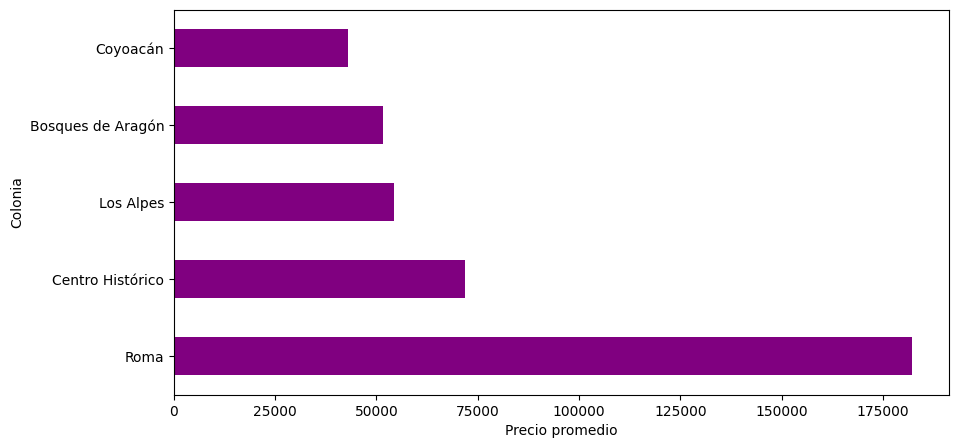

In [32]:
colonias_mx_promedio.plot (kind='barh', figsize=(10, 5), color='purple',  xlabel = 'Precio promedio', legend=False)

### **Tratamiento de datos nulos**

In [33]:
df_deptos.isnull().sum()

Tipo               0
Colonia            0
Habitaciones       0
Garages            0
Suites             0
Area               0
Valor              7
Condominio       493
Impuesto        3797
dtype: int64

In [34]:
df_deptos = df_deptos.fillna(0)
df_deptos.isnull().sum()

Tipo            0
Colonia         0
Habitaciones    0
Garages         0
Suites          0
Area            0
Valor           0
Condominio      0
Impuesto        0
dtype: int64

### **Remover registros incosistentes**

In [35]:
#Identificar los departamentos que tienen un valor de 0 o condominio de 0

df_deptos.query('Valor == 0 | Condominio == 0 ')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0
49,Departamento,Santa Fe,2,1,1,70,0.0,3395.0,238.0
74,Departamento,Ciudad de los Deportes,2,0,0,80,3500.0,0.0,0.0
116,Departamento,El Rosedal,2,1,0,50,3850.0,0.0,0.0
136,Departamento,Santa Fe,1,1,1,65,8225.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24721,Departamento,Doctores,2,0,0,43,3150.0,0.0,56.0
24736,Departamento,Condesa,1,0,0,30,9100.0,0.0,0.0
24866,Departamento,Condesa,3,0,0,130,16100.0,0.0,0.0
24892,Departamento,Loma Bonita,1,0,0,40,1925.0,0.0,0.0


In [36]:
#Identifica los índices de los departamentos que tienen valor cero o condominio cero y los guarda en una variable
df_remover = df_deptos.query('Valor == 0 | Condominio == 0 ').index
df_remover

Index([    7,    49,    74,   116,   136,   185,   199,   432,   504,   527,
       ...
       24426, 24555, 24563, 24597, 24671, 24721, 24736, 24866, 24892, 25014],
      dtype='int64', length=500)

In [37]:
#Remueve las filas con valor cero o condominio cero
df_deptos.drop(df_remover, axis=0, inplace=True)

In [38]:
#Verificar si hay valores cero en las columnas de interés
df_deptos.query('Valor == 0 | Condominio == 0 ').index

Index([], dtype='int64')

In [39]:
df_deptos.head(15)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
13,Departamento,Santa Fe,2,1,1,67,5950.0,2061.5,514.5
14,Departamento,Narvarte,2,1,0,110,6650.0,2450.0,483.0
16,Departamento,Narvarte,2,1,0,78,7000.0,2450.0,0.0
18,Departamento,Coyoacán,3,1,1,125,24500.0,7350.0,1620.5
19,Departamento,Narvarte,1,0,0,48,2625.0,2702.0,87.5
20,Departamento,Santa Fe,3,3,1,175,14700.0,5250.0,1750.0


In [40]:
df_deptos.Tipo.unique()

array(['Departamento'], dtype=object)

In [41]:
#Eliminar la columna Tipo ya que todas las filas son del tipo "Departamento"
df_deptos.drop('Tipo', axis=1, inplace=True)
df_deptos.head(15)

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Condesa,4,3,1,243,45500.0,7000.0,2810.5
13,Santa Fe,2,1,1,67,5950.0,2061.5,514.5
14,Narvarte,2,1,0,110,6650.0,2450.0,483.0
16,Narvarte,2,1,0,78,7000.0,2450.0,0.0
18,Coyoacán,3,1,1,125,24500.0,7350.0,1620.5
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
20,Santa Fe,3,3,1,175,14700.0,5250.0,1750.0


### ** Creando Filtros **

# 1. Apartamentos que tienen  1 dormitorio y un alquiler menor a MXN 4200

In [42]:
select_1 = df_deptos['Habitaciones'] == 1
type(select_1)

pandas.core.series.Series

In [43]:
df_deptos[select_1]

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Condesa,1,0,1,40,7000.0,1963.5,175.0
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
...,...,...,...,...,...,...,...,...
25090,Coyoacán,1,0,0,55,7000.0,2205.0,66.5
25092,Santa Fe,1,1,0,62,5950.0,3307.5,630.0
25100,Lomas de Chapultepec,1,1,1,50,15050.0,6055.0,906.5
25103,Condesa,1,0,0,50,6825.0,1575.0,245.0


In [44]:
select_2 = df_deptos['Valor'] < 4200
df_deptos[select_2]

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...
25038,Villa de Guadalupe,2,1,0,50,2800.0,1435.0,0.0
25051,Nativitas,2,1,0,62,3500.0,1050.0,0.0
25065,Nativitas,2,1,0,50,3150.0,1050.0,0.0
25095,Lindavista Sur,2,0,0,63,2800.0,1372.0,0.0


In [45]:
df_deptos[select_2].max()

Colonia         Álvaro Obregón
Habitaciones                 3
Garages                      2
Suites                       2
Area                       176
Valor                   4025.0
Condominio            152575.5
Impuesto                6699.0
dtype: object

In [46]:
filter_1 =(select_1) & (select_2)
df_deptos[filter_1]

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...
24710,Nativitas,1,0,0,40,3150.0,1522.5,0.0
24872,Peralvillo,1,0,1,69,3150.0,2240.0,441.0
24880,La Condesa,1,0,0,46,3850.0,1585.5,112.0
24943,Roma,1,0,0,21,3500.0,987.0,87.5


In [47]:
df_deptos_1 = df_deptos[filter_1]
df_deptos_1.head(10)

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
101,San Miguel Chapultepec,1,0,0,37,3500.0,997.5,84.0
212,Roma,1,0,0,35,3500.0,1025.5,301.0
247,Nueva Santa María,1,1,0,63,2450.0,2187.5,126.0
412,Napoles,1,0,0,31,3990.0,1470.0,84.0
429,Roma,1,0,0,17,3850.0,1155.0,52.5


# 2. Apartamentos que tienen al menor 2 dormitorios, un alquiler menor a MXN  10500 y una superficie mayor a 70 m2

In [48]:
filter_2 = (df_deptos['Habitaciones'] >= 2) & (df_deptos['Valor'] < 10500) &(df_deptos['Area'] > 70)
df_deptos[filter_2]

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
14,Narvarte,2,1,0,110,6650.0,2450.0,483.0
16,Narvarte,2,1,0,78,7000.0,2450.0,0.0
21,Roma,2,1,0,76,8750.0,2590.0,0.0
33,Santa Fe,3,1,1,72,8225.0,2100.0,245.0
58,Santa Fe,3,2,1,104,9100.0,4774.0,1421.0
...,...,...,...,...,...,...,...,...
25028,Del Valle,2,0,1,90,7700.0,1890.0,483.0
25062,Santa Fe,2,1,1,72,5950.0,3045.0,560.0
25063,Narvarte,3,1,0,75,6650.0,3010.0,493.5
25105,Santa Fe,2,1,1,85,7875.0,5463.5,689.5


In [49]:
df_deptos_2 = df_deptos[filter_2]
df_deptos_2.head(10)

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
14,Narvarte,2,1,0,110,6650.0,2450.0,483.0
16,Narvarte,2,1,0,78,7000.0,2450.0,0.0
21,Roma,2,1,0,76,8750.0,2590.0,0.0
33,Santa Fe,3,1,1,72,8225.0,2100.0,245.0
58,Santa Fe,3,2,1,104,9100.0,4774.0,1421.0
60,Santa Fe,2,1,1,88,9450.0,4550.0,7147.0
63,Santa Fe,3,2,2,85,8750.0,4900.0,665.0
68,Santa Fe,2,1,1,78,9625.0,4550.0,483.0
75,Narvarte,2,1,0,80,6300.0,3850.0,294.0
79,Narvarte,3,1,0,172,9450.0,2730.0,595.0


# 3. Apartamentos que tienen un área mayor de 80 m2 o un alquiler menor de MXN 4000

In [50]:
filter_3 = (df_deptos['Area'] > 80) | (df_deptos['Valor'] < 4000)
df_deptos[filter_3]

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
10,Condesa,4,3,1,243,45500.0,7000.0,2810.5
14,Narvarte,2,1,0,110,6650.0,2450.0,483.0
18,Coyoacán,3,1,1,125,24500.0,7350.0,1620.5
...,...,...,...,...,...,...,...,...
25105,Santa Fe,2,1,1,85,7875.0,5463.5,689.5
25106,Santa Fe,3,2,0,98,8050.0,3104.5,619.5
25108,Santa Fe,3,2,2,140,19250.0,6650.0,2450.0
25113,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0


In [51]:
df_deptos_3 = df_deptos[filter_3]
df_deptos_3.head(10)

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
10,Condesa,4,3,1,243,45500.0,7000.0,2810.5
14,Narvarte,2,1,0,110,6650.0,2450.0,483.0
18,Coyoacán,3,1,1,125,24500.0,7350.0,1620.5
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
20,Santa Fe,3,3,1,175,14700.0,5250.0,1750.0
22,Condesa,3,1,2,378,35000.0,7525.0,2450.0
23,Condesa,3,0,0,180,19250.0,6230.0,1470.0
25,Lomas de Chapultepec,3,1,0,110,13650.0,5250.0,420.0


## **Guardar los resultados en un archivo CSV**

In [52]:
df_deptos.to_csv('departamentos.csv', index=False, sep = ';') #no guarda indice original y repeta el separador original

In [53]:
df_deptos_1.to_csv('departamentos_f1.csv', index=False, sep = ';')

In [54]:
df_deptos_2.to_csv('departamentos_f2.csv', index=False, sep = ';')
df_deptos_3.to_csv('departamentos_f3.csv', index=False, sep = ';')

## **Demandas de DEV**

### **Crear columnas numéricas**

#### 1. valor_mensual: Esta columna debe contener los gastos mensuales de cada propiedad, incluyendo el alquiler y el condominio

In [59]:
url2 = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'
data2 = pd.read_csv(url, sep = ';')
data2.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [60]:
data2.shape

(25121, 9)

In [61]:
data2['Valor_mensual'] = data2['Valor'] + data2['Condominio']
data2.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0


#### 2. valor_anual: Esta columna debe tener los gastos por propiedad, es decir, el impuesto más condominio

In [64]:
data2['Valor_anual'] = data2['Valor_mensual'] * 12 + data2['Impuesto']
data2.tail()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5,4025.0,48387.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5,6681.5,80307.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN,13160.0,NaN
25120,Conjunto Comercial/Sala,Centro Histórico,0,0,0,250,22750.0,14721.0,3881.5,37471.0,453533.5


### **Crear columna categóricas

#### Descripción:  Esta columna debe contener un resumen de la información clave de las propiedades que se mostrarán en el sitio web: tipo de propiedad, barrio, cantidad de habitaciones y plazas de estacionamiento.


In [71]:
data2['Descripcion'] = data2['Tipo'] + ' en la colonia ' + data2['Colonia'] + \
    ' con ' + data2['Habitaciones'].astype(str) + ' cuarto(s) y ' + \
    data2['Garages'].astype(str) + ' lugar(es) de estacionamiento'
data2.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0,Cocineta en la colonia Condesa con 1 cuarto(s)...
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en la colonia Polanco con 2 cuarto(s) y 0...
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5,Conjunto Comercial/Sala en la colonia Santa Fe...
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0,Departamento en la colonia Centro Histórico co...
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN,Departamento en la colonia Del Valle con 1 cua...


,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
1,Del Valle,1,0,0,48,2800.0,805.0,0.0
2,Condesa,1,0,1,40,7000.0,1963.5,175.0
3,Condesa,4,3,1,243,45500.0,7000.0,2810.5
4,Santa Fe,2,1,1,67,5950.0,2061.5,514.5
5,Narvarte,2,1,0,110,6650.0,2450.0,483.0
6,Narvarte,2,1,0,78,7000.0,2450.0,0.0
7,Coyoacán,3,1,1,125,24500.0,7350.0,1620.5
8,Narvarte,1,0,0,48,2625.0,2702.0,87.5
9,Santa Fe,3,3,1,175,14700.0,5250.0,1750.0
10,Roma,2,1,0,76,8750.0,2590.0,0.0


####Tiene_suite: Esta debe ser una columna que indique únicamente si la propiedad tiene o no suites, sin importar la cantidad.

In [83]:
data2['Tiene_suite'] =data2['Suites'].apply(lambda x:'Sí' if x > 0 else 'No')
data2.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion,Tiene_suite
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0,Cocineta en la colonia Condesa con 1 cuarto(s)...,No
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en la colonia Polanco con 2 cuarto(s) y 0...,Sí
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5,Conjunto Comercial/Sala en la colonia Santa Fe...,No
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0,Departamento en la colonia Centro Histórico co...,No
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN,Departamento en la colonia Del Valle con 1 cua...,No


In [85]:
data2.to_csv('inmuebles_dev.csv', index=False, sep=';')